In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Preparing the dataset 

In [23]:
# For this homework, we'll use the Laptops Price dataset saved locally in homework 1

# Read the CSV file
df = pd.read_csv('laptops.csv')

#Normalize the names of the columns
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Select only the specified columns
df_focused = df[['ram', 'storage', 'screen', 'final_price']]

# Print all column names
print("Available columns:")
print(df_focused.columns.tolist())

Available columns:
['ram', 'storage', 'screen', 'final_price']


## Exploratory Data Analysis
### Look at the final_price variable. Does it have a long tail?

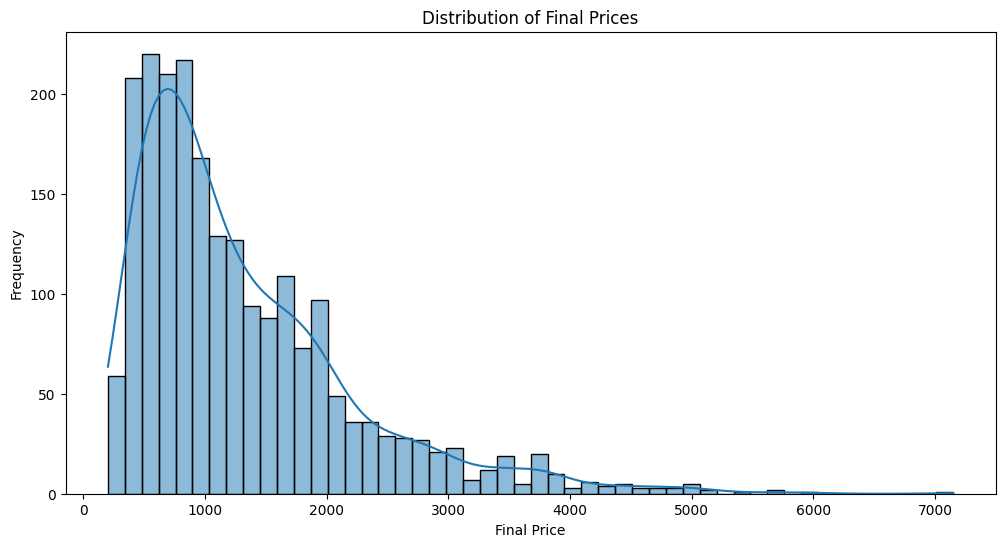

In [24]:
# Plot the histogram of final prices
plt.figure(figsize=(12, 6))
sns.histplot(df_focused['final_price'], bins=50, kde=True)
plt.title('Distribution of Final Prices')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.show()


## Question 1
### There's one column with missing values. What is it?

In [28]:
# Check for missing values
missing_values = df_focused.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Identify the column with missing values
column_with_missing_values = missing_values[missing_values > 0].index[0]
print(f"\nColumn with missing values: {column_with_missing_values}")


Missing values in each column:
ram            0
storage        0
screen         4
final_price    0
dtype: int64

Column with missing values: screen


## Question 2
### What's the median (50% percentile) for variable 'ram'?

In [32]:
# Calculate median from df with selected columns
median_ram = df_focused['ram'].median()
print(f"The median (50th percentile) for 'ram' is: {median_ram}")

The median (50th percentile) for 'ram' is: 16.0


## Prepare and split the dataset
### Shuffle the dataset (the filtered one you created above), use seed 42.
### Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [34]:
# Set the random seed for reproducibility
np.random.seed(42)  

# Get the total number of samples
n = len(df_focused)

# Calculate the sizes for each split
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

# Create an array of indices and shuffle it
idx = np.arange(n)
np.random.shuffle(idx)

# Use the shuffled indices to reorder the DataFrame
df_shuffled = df_focused.iloc[idx]

# Split the shuffled DataFrame into train, validation, and test sets
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# Verify the sizes of each split
print(f"Total dataset size: {n}")
print(f"Train set size: {len(df_train)} ({len(df_train)/n:.2%})")
print(f"Validation set size: {len(df_val)} ({len(df_val)/n:.2%})")
print(f"Test set size: {len(df_test)} ({len(df_test)/n:.2%})")

Total dataset size: 2160
Train set size: 1296 (60.00%)
Validation set size: 432 (20.00%)
Test set size: 432 (20.00%)


## Question 3
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE? With 0, with mean, both are equally good

In [40]:
# Function to train linear regression model
def train_linear_regression(X, y):
    # Add a column of ones to X for the intercept term
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # Calculate the coefficients using the normal equation
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    # Return intercept and coefficients separately
    return w[0], w[1:]

# Function to prepare feature matrix X
def prepare_X(df, fill_value):
    # Select numerical columns
    df_num = df[['ram', 'storage', 'screen']]
    # Fill missing values with the specified fill_value
    df_num = df_num.fillna(fill_value)
    # Convert to numpy array
    X = df_num.values
    return X

# Function to calculate Root Mean Squared Error
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

# Prepare data with missing values filled with 0
X_train_0 = prepare_X(df_train, 0)
X_val_0 = prepare_X(df_val, 0)

# Train model and make predictions (fill with 0)
w_0_0, w_0 = train_linear_regression(X_train_0, df_train['final_price'])
y_pred_train_0 = w_0_0 + X_train_0.dot(w_0)  # Predictions on training set
y_pred_val_0 = w_0_0 + X_val_0.dot(w_0)  # Predictions on validation set

# Calculate RMSE (fill with 0)
rmse_train_0 = round(rmse(df_train['final_price'], y_pred_train_0), 2)
rmse_val_0 = round(rmse(df_val['final_price'], y_pred_val_0), 2)

print(f"RMSE (train) when filling missing values with 0: {rmse_train_0}")
print(f"RMSE (validation) when filling missing values with 0: {rmse_val_0}")

# Calculate mean of 'screen' from training data
screen_mean = df_train['screen'].mean()

# Prepare data with missing values filled with mean
X_train_mean = prepare_X(df_train, screen_mean)
X_val_mean = prepare_X(df_val, screen_mean)

# Train model and make predictions (fill with mean)
w_0_mean, w_mean = train_linear_regression(X_train_mean, df_train['final_price'])
y_pred_train_mean = w_0_mean + X_train_mean.dot(w_mean)  # Predictions on training set
y_pred_val_mean = w_0_mean + X_val_mean.dot(w_mean)  # Predictions on validation set

# Calculate RMSE (fill with mean)
rmse_train_mean = round(rmse(df_train['final_price'], y_pred_train_mean), 2)
rmse_val_mean = round(rmse(df_val['final_price'], y_pred_val_mean), 2)

print(f"RMSE (train) when filling missing values with mean: {rmse_train_mean}")
print(f"RMSE (validation) when filling missing values with mean: {rmse_val_mean}")
print("Smaller RMSE is better, therefore:")

# Compare results
if rmse_val_0 < rmse_val_mean:
    print("Filling missing values with 0 gives better RMSE on the validation set.")
elif rmse_val_mean < rmse_val_0:
    print("Filling missing values with mean gives better RMSE on the validation set.")
else:
    print("Both options are equally good on the validation set.")

RMSE (train) when filling missing values with 0: 602.39
RMSE (validation) when filling missing values with 0: 597.36
RMSE (train) when filling missing values with mean: 602.18
RMSE (validation) when filling missing values with mean: 600.27
Smaller RMSE is better, therefore:
Filling missing values with 0 gives better RMSE on the validation set.


## Question 4
* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?
* If there are multiple options, select the smallest r.

In [41]:
def prepare_X(df):
    # Select features and fill NAs with 0
    return df[['ram', 'storage', 'screen']].fillna(0).values

def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    reg[0, 0] = 0  # Don't regularize the bias term
    
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

# Prepare the data
X_train = prepare_X(df_train)
y_train = df_train['final_price'].values

X_val = prepare_X(df_val)
y_val = df_val['final_price'].values

# List of r values to try
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

# Dictionary to store RMSE for each r
rmse_scores = {}

# Train and evaluate models for each r
for r in r_values:
    # Train the model
    w_0, w = train_linear_regression_reg(X_train, y_train, r)
    
    # Make predictions on validation set
    y_pred = w_0 + X_val.dot(w)
    
    # Calculate RMSE
    rmse_val = round(rmse(y_val, y_pred), 2)
    
    # Store the RMSE score
    rmse_scores[r] = rmse_val
    
    print(f"RMSE for r={r}: {rmse_val}")

# Find the best r (smallest r if there are multiple with the same RMSE)
best_r = min(rmse_scores, key=lambda x: (rmse_scores[x], x))

print(f"\nBest r: {best_r}")
print(f"Best RMSE: {rmse_scores[best_r]}")

RMSE for r=0: 597.36
RMSE for r=0.01: 597.36
RMSE for r=0.1: 597.36
RMSE for r=1: 597.36
RMSE for r=5: 597.36
RMSE for r=10: 597.36
RMSE for r=100: 597.34

Best r: 100
Best RMSE: 597.34


## Question 5
* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))
* What's the value of std?

In [42]:
def prepare_X(df):
    return df[['ram', 'storage', 'screen']].fillna(0).values

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

# List of seeds to try
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# List to store RMSE scores for each seed
rmse_scores = []

for seed in seeds:
    # Set the seed for reproducibility
    np.random.seed(seed)
    
    # Shuffle the dataset
    df_shuffled = df.sample(frac=1, random_state=seed)
    
    # Calculate split indices
    n = len(df_shuffled)
    n_train = int(0.6 * n)
    n_val = int(0.2 * n)
    
    # Split the data
    df_train = df_shuffled[:n_train]
    df_val = df_shuffled[n_train:n_train+n_val]
    df_test = df_shuffled[n_train+n_val:]
    
    # Prepare the data
    X_train = prepare_X(df_train)
    y_train = df_train['final_price'].values
    
    X_val = prepare_X(df_val)
    y_val = df_val['final_price'].values
    
    # Train the model
    w_0, w = train_linear_regression(X_train, y_train)
    
    # Make predictions on validation set
    y_pred = w_0 + X_val.dot(w)
    
    # Calculate RMSE
    rmse_val = rmse(y_val, y_pred)
    
    # Store the RMSE score
    rmse_scores.append(rmse_val)
    
    print(f"RMSE for seed {seed}: {rmse_val}")

# Calculate the standard deviation of RMSE scores
std_rmse = np.std(rmse_scores)

# Round to 3 decimal places
std_rmse_rounded = round(std_rmse, 3)

print(f"\nStandard deviation of RMSE scores: {std_rmse_rounded}")

RMSE for seed 0: 565.4520868770982
RMSE for seed 1: 636.7985423056721
RMSE for seed 2: 588.9558697907974
RMSE for seed 3: 597.8148920012529
RMSE for seed 4: 571.9627915111022
RMSE for seed 5: 573.2383256618932
RMSE for seed 6: 647.3438328407256
RMSE for seed 7: 550.4398184485927
RMSE for seed 8: 587.3335036169934
RMSE for seed 9: 576.1017929433089

Standard deviation of RMSE scores: 29.176


## Question 6
* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

In [43]:
def prepare_X(df):
    return df[['ram', 'storage', 'screen']].fillna(0).values

def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    reg[0, 0] = 0  # Don't regularize the bias term
    
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

# Set the seed for reproducibility
np.random.seed(9)

# Shuffle the dataset
df_shuffled = df.sample(frac=1, random_state=9)

# Calculate split indices
n = len(df_shuffled)
n_train = int(0.6 * n)
n_val = int(0.2 * n)

# Split the data
df_train = df_shuffled[:n_train]
df_val = df_shuffled[n_train:n_train+n_val]
df_test = df_shuffled[n_train+n_val:]

# Combine train and validation datasets
df_train_val = pd.concat([df_train, df_val])

# Prepare the data
X_train_val = prepare_X(df_train_val)
y_train_val = df_train_val['final_price'].values

X_test = prepare_X(df_test)
y_test = df_test['final_price'].values

# Train the model with r=0.001
r = 0.001
w_0, w = train_linear_regression_reg(X_train_val, y_train_val, r)

# Make predictions on test set
y_pred = w_0 + X_test.dot(w)

# Calculate RMSE on test set
rmse_test = rmse(y_test, y_pred)

print(f"RMSE on the test set: {rmse_test}")

RMSE on the test set: 608.6102784353504
